<a href="https://colab.research.google.com/github/oscarvel821/cs482-assignments/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import pathlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import  Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import ResNet50

#Part 1 Loading of Dataset in Colab (10 points)

Create a jupyter notebook (eg on Google Colab) and download the LFW dataset, from here.

You can manually download the dataset using the above link and then upload to colab or altelnatively you can issue in colab the commands shown below

In [ ]:
path = "lfw"

if not os.path.exists(path):
  !wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
  !tar -xvf /content/lfw.tgz

I decided to crop every image so that only the face is showing

In [ ]:
root = '/content/resized_lfw'

os.mkdir(root)

In [ ]:
face_cascade1 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_cascade2 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
face_cascade3 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
face_cascade4 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt_tree.xml')

In [ ]:
cas2 = ['/content/lfw/Albrecht_Mentz/Albrecht_Mentz_0002.jpg', 
        '/content/lfw/Amer_al-Saadi/Amer_al-Saadi_0002.jpg',
        '/content/lfw/Amer_al-Saadi/Amer_al-Saadi_0003.jpg',
        '/content/lfw/Anders_Ebbeson/Anders_Ebbeson_0001.jpg', 
        '/content/lfw/Andre_Agassi/Andre_Agassi_0002.jpg',
        '/content/lfw/Andy_Roddick/Andy_Roddick_0002.jpg',
        '/content/lfw/Ariel_Sharon/Ariel_Sharon_0017.jpg',
        '/content/lfw/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0036.jpg',
        '/content/lfw/Asa_Hutchinson/Asa_Hutchinson_0001.jpg',
        '/content/lfw/Ben_Curtis/Ben_Curtis_0001.jpg',
        '/content/lfw/Bill_Clinton/Bill_Clinton_0008.jpg',
        '/content/lfw/Bill_Clinton/Bill_Clinton_0014.jpg',
        '/content/lfw/Brandon_Webb/Brandon_Webb_0001.jpg',
        '/content/lfw/Brian_Lara/Brian_Lara_0001.jpg',
        '/content/lfw/Carlos_Menem/Carlos_Menem_0003.jpg',
        '/content/lfw/Carlos_Moya/Carlos_Moya_0011.jpg',
        '/content/lfw/Charlton_Heston/Charlton_Heston_0002.jpg',
        '/content/lfw/Chris_Matthews/Chris_Matthews_0001.jpg',
        '/content/lfw/Colin_Powell/Colin_Powell_0005.jpg',
        '/content/lfw/Colin_Powell/Colin_Powell_0078.jpg',
        '/content/lfw/Colin_Powell/Colin_Powell_0185.jpg',
        '/content/lfw/Colin_Powell/Colin_Powell_0227.jpg',
        '/content/lfw/Colin_Powell/Colin_Powell_0152.jpg',
        '/content/lfw/Dick_Cheney/Dick_Cheney_0001.jpg',
        '/content/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0044.jpg',
        '/content/lfw/Enrica_Fico/Enrica_Fico_0001.jpg',
        '/content/lfw/George_P_Bush/George_P_Bush_0001.jpg',
        '/content/lfw/George_W_Bush/George_W_Bush_0046.jpg',
        '/content/lfw/Gray_Davis/Gray_Davis_0023.jpg',
        '/content/lfw/Gray_Davis/Gray_Davis_0012.jpg',
        '/content/lfw/Gray_Davis/Gray_Davis_0009.jpg',
        '/content/lfw/Gregory_Geoffroy/Gregory_Geoffroy_0001.jpg',
        '/content/lfw/Guennadi_Chipouline/Guennadi_Chipouline_0001.jpg',
        '/content/lfw/Guillermo_Coria/Guillermo_Coria_0019.jpg',
        '/content/lfw/Hank_McKinnell/Hank_McKinnell_0001.jpg',
        '/content/lfw/Hidetoshi_Nakata/Hidetoshi_Nakata_0001.jpg',
        '/content/lfw/Hun_Sen/Hun_Sen_0003.jpg',
        '/content/lfw/Ivana_Trump/Ivana_Trump_0001.jpg',
        '/content/lfw/Jacques_Chirac/Jacques_Chirac_0021.jpg',
        '/content/lfw/James_Phelps/James_Phelps_0001.jpg',
        '/content/lfw/Jane_Riley/Jane_Riley_0001.jpg',
        '/content/lfw/Jenna_Elfman/Jenna_Elfman_0001.jpg',
        '/content/lfw/Jay_Garner/Jay_Garner_0002.jpg',
        '/content/lfw/Jean-Pierre_Raffarin/Jean-Pierre_Raffarin_0007.jpg',
        '/content/lfw/Jesse_Helms/Jesse_Helms_0001.jpg',
        '/content/lfw/Jim_Furyk/Jim_Furyk_0004.jpg',
        '/content/lfw/Joe_Dumars/Joe_Dumars_0002.jpg',
        '/content/lfw/Joe_Mantegna/Joe_Mantegna_0001.jpg',
        '/content/lfw/John_Howard/John_Howard_0008.jpg',
        '/content/lfw/John_Manley/John_Manley_0006.jpg',
        '/content/lfw/Jose_Carreras/Jose_Carreras_0001.jpg',
        '/content/lfw/Juan_Antonio_Samaranch/Juan_Antonio_Samaranch_0001.jpg',
        '/content/lfw/Julie_Gerberding/Julie_Gerberding_0005.jpg',
        '/content/lfw/Junichiro_Koizumi/Junichiro_Koizumi_0043.jpg',
        '/content/lfw/Keith_Bogans/Keith_Bogans_0001.jpg',
        '/content/lfw/Keith_Brown/Keith_Brown_0001.jpg',
        '/content/lfw/Keith_Osik/Keith_Osik_0001.jpg',
        '/content/lfw/Klaus_Schwab/Klaus_Schwab_0001.jpg',
        '/content/lfw/Kim_Clijsters/Kim_Clijsters_0010.jpg',
        '/content/lfw/Kristin_Scott/Kristin_Scott_0001.jpg',
        '/content/lfw/Lennox_Lewis/Lennox_Lewis_0003.jpg',
        '/content/lfw/Lindsay_Davenport/Lindsay_Davenport_0015.jpg',
        '/content/lfw/Lindsay_Lohan/Lindsay_Lohan_0001.jpg',
        '/content/lfw/Lisa_Stone/Lisa_Stone_0001.jpg',
        '/content/lfw/Nestor_Kirchner/Nestor_Kirchner_0005.jpg',
        '/content/lfw/Nick_Markakis/Nick_Markakis_0001.jpg',
        '/content/lfw/Pierre_Pettigrew/Pierre_Pettigrew_0001.jpg',
        '/content/lfw/Prince_Edward/Prince_Edward_0001.jpg',
        '/content/lfw/Richie_Adubato/Richie_Adubato_0002.jpg',
        '/content/lfw/Tom_Gamboa/Tom_Gamboa_0001.jpg',
        '/content/lfw/Tom_Watson/Tom_Watson_0001.jpg',
        '/content/lfw/Tony_Blair/Tony_Blair_0024.jpg',
        '/content/lfw/Tzipora_Obziler/Tzipora_Obziler_0001.jpg',
        '/content/lfw/Valdas_Adamkus/Valdas_Adamkus_0001.jpg',
        '/content/lfw/Vladimir_Putin/Vladimir_Putin_0004.jpg',
        '/content/lfw/Yekaterina_Guseva/Yekaterina_Guseva_0001.jpg',
        '/content/lfw/Eugene_Melnyk/Eugene_Melnyk_0001.jpg',
        '/content/lfw/Amy_Smart/Amy_Smart_0001.jpg',
        '/content/lfw/Dennis_Hastert/Dennis_Hastert_0005.jpg']

cas3 = ['/content/lfw/Andy_Roddick/Andy_Roddick_0004.jpg',
        '/content/lfw/Andy_Roddick/Andy_Roddick_0010.jpg',
        '/content/lfw/Andy_Roddick/Andy_Roddick_0005.jpg',
        '/content/lfw/Brian_Schneider/Brian_Schneider_0001.jpg',
        '/content/lfw/Jean-Francois_Pontal/Jean-Francois_Pontal_0003.jpg',
        '/content/lfw/Jelena_Dokic/Jelena_Dokic_0004.jpg',
        '/content/lfw/Jennifer_Capriati/Jennifer_Capriati_0008.jpg',
        '/content/lfw/John_Burkett/John_Burkett_0001.jpg',
        '/content/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0005.jpg',
        '/content/lfw/Lance_Armstrong/Lance_Armstrong_0007.jpg',
        '/content/lfw/Larry_Hagman/Larry_Hagman_0001.jpg',
        '/content/lfw/Lois_Smart/Lois_Smart_0001.jpg',
        '/content/lfw/Lawrence_Foley/Lawrence_Foley_0001.jpg',
        '/content/lfw/Madeleine_Albright/Madeleine_Albright_0001.jpg',
        '/content/lfw/Mahmoud_Abbas/Mahmoud_Abbas_0001.jpg',
        '/content/lfw/Mahmoud_Abbas/Mahmoud_Abbas_0023.jpg',
        '/content/lfw/Michael_Frayn/Michael_Frayn_0001.jpg',
        '/content/lfw/Michelle_Pfeiffer/Michelle_Pfeiffer_0001.jpg',
        '/content/lfw/Mickey_Rooney/Mickey_Rooney_0001.jpg',
        '/content/lfw/Miguel_Hakim/Miguel_Hakim_0001.jpg',
        '/content/lfw/Nabil_Shaath/Nabil_Shaath_0002.jpg',
        '/content/lfw/Nadia_Petrova/Nadia_Petrova_0001.jpg',
        '/content/lfw/Naji_Sabri/Naji_Sabri_0002.jpg',
        '/content/lfw/Nicole_Kidman/Nicole_Kidman_0002.jpg',
        '/content/lfw/Paul_Wolfowitz/Paul_Wolfowitz_0008.jpg',
        '/content/lfw/Pele/Pele_0001.jpg',
        '/content/lfw/Peter_Fonda/Peter_Fonda_0001.jpg',
        '/content/lfw/Porter_Goss/Porter_Goss_0001.jpg',
        '/content/lfw/Richard_Gere/Richard_Gere_0001.jpg',
        '/content/lfw/Ronald_Ito/Ronald_Ito_0001.jpg',
        '/content/lfw/Roseanne_Barr/Roseanne_Barr_0001.jpg',
        '/content/lfw/Roy_Halladay/Roy_Halladay_0001.jpg',
        '/content/lfw/Scott_Verplank/Scott_Verplank_0001.jpg',
        '/content/lfw/Serena_Williams/Serena_Williams_0006.jpg',
        '/content/lfw/Serena_Williams/Serena_Williams_0035.jpg',
        '/content/lfw/Serena_Williams/Serena_Williams_0032.jpg',
        '/content/lfw/Serena_Williams/Serena_Williams_0002.jpg',
        '/content/lfw/Serena_Williams/Serena_Williams_0016.jpg',
        '/content/lfw/Seymour_Cassell/Seymour_Cassell_0001.jpg',
        '/content/lfw/Shingo_Katayama/Shingo_Katayama_0001.jpg',
        '/content/lfw/Tammy_Lynn_Michaels/Tammy_Lynn_Michaels_0001.jpg',
        '/content/lfw/Tariq_Aziz/Tariq_Aziz_0006.jpg',
        '/content/lfw/Yasser_Arafat/Yasser_Arafat_0004.jpg',
        '/content/lfw/Yuvraj_Singh/Yuvraj_Singh_0001.jpg',
        '/content/lfw/Francisco_Flores/Francisco_Flores_0003.jpg',
        '/content/lfw/Elena_de_Chavez/Elena_de_Chavez_0001.jpg',
        '/content/lfw/Gennifer_Flowers/Gennifer_Flowers_0001.jpg']

ignore = ['/content/lfw/Billy_Andrade/Billy_Andrade_0001.jpg',
          '/content/lfw/Budd_Schulberg/Budd_Schulberg_0001.jpg',
          '/content/lfw/Buddy_Ryan/Buddy_Ryan_0001.jpg',
          '/content/lfw/Clive_Lloyd/Clive_Lloyd_0001.jpg',
          '/content/lfw/Dereck_Whittenburg/Dereck_Whittenburg_0001.jpg',
          '/content/lfw/Hans_Corell/Hans_Corell_0001.jpg',
          '/content/lfw/Hernan_Diaz/Hernan_Diaz_0001.jpg',
          '/content/lfw/Jerry_Rice/Jerry_Rice_0001.jpg',
          '/content/lfw/Newt_Gingrich/Newt_Gingrich_0001.jpg',
          '/content/lfw/Taia_Balk/Taia_Balk_0001.jpg',
          '/content/lfw/Tara_Kirk/Tara_Kirk_0001.jpg',
          '/content/lfw/Thomas_Weston/Thomas_Weston_0001.jpg',
          '/content/lfw/Tom_McClintock/Tom_McClintock_0001.jpg',
          '/content/lfw/Vecdi_Gonul/Vecdi_Gonul_0001.jpg',
          '/content/lfw/Max_von_Sydow/Max_von_Sydow_0001.jpg']

skip = ['/content/lfw/Charles_Mathews/Charles_Mathews_0002.jpg',
        '/content/lfw/Christina_Aguilera/Christina_Aguilera_0001.jpg',
        '/content/lfw/Fred_Huff/Fred_Huff_0001.jpg',
        '/content/lfw/George_W_Bush/George_W_Bush_0157.jpg',
        '/content/lfw/Hootie_Johnson/Hootie_Johnson_0001.jpg',
        '/content/lfw/Igor_Ivanov/Igor_Ivanov_0007.jpg',
        '/content/lfw/Jimmy_Carter/Jimmy_Carter_0007.jpg',
        '/content/lfw/John_Bolton/John_Bolton_0008.jpg',
        '/content/lfw/John_Bolton/John_Bolton_0005.jpg',
        '/content/lfw/Justine_Henin/Justine_Henin_0003.jpg',
        '/content/lfw/Kate_Capshaw/Kate_Capshaw_0002.jpg',
        '/content/lfw/Ken_Macha/Ken_Macha_0003.jpg',
        '/content/lfw/Lucio_Gutierrez/Lucio_Gutierrez_0011.jpg',
        '/content/lfw/Marwan_Barghouthi/Marwan_Barghouthi_0002.jpg',
        '/content/lfw/Monique_Garbrecht-Enfeldt/Monique_Garbrecht-Enfeldt_0002.jpg',
        '/content/lfw/Naji_Sabri/Naji_Sabri_0006.jpg',
        '/content/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0015.jpg',
        '/content/lfw/Steve_Ballmer/Steve_Ballmer_0001.jpg',
        '/content/lfw/Tung_Chee-hwa/Tung_Chee-hwa_0001.jpg',
        '/content/lfw/Vicente_Fox/Vicente_Fox_0020.jpg',
        '/content/lfw/Woody_Allen/Woody_Allen_0004.jpg',
        '/content/lfw/Yasser_Arafat/Yasser_Arafat_0005.jpg',
        '/content/lfw/Yasser_Arafat/Yasser_Arafat_0007.jpg',
        '/content/lfw/Gray_Davis/Gray_Davis_0018.jpg',
        '/content/lfw/Yasser_Arafat/Yasser_Arafat_0003.jpg',
        '/content/lfw/George_W_Bush/George_W_Bush_0096.jpg']

In [ ]:
from IPython.utils.process import shutil
lfw_dir = os.listdir("lfw")
lfw_dir.sort()

for d in lfw_dir:
  img_dir = os.listdir("lfw/" + d)

  # print(root + '/' + d)
  os.mkdir(root + '/' + d)

  for file in img_dir:
    # img = cv2.imread("/content/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg", cv2.IMREAD_COLOR)
    print('/content/lfw/' + d + '/' + file)
    img = cv2.imread('/content/lfw/' + d + '/' + file)

    faces_detected = face_cascade1.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    # if len(faces_detected) == 0:
    #   faces_detected = face_cascade1.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    if '/content/lfw/' + d + '/' + file in cas2:
      faces_detected = face_cascade2.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    elif '/content/lfw/' + d + '/' + file in cas3:
      faces_detected = face_cascade3.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    elif '/content/lfw/' + d + '/' + file in skip:
      continue
    elif '/content/lfw/' + d + '/' + file in ignore:
      os.rmdir(root + '/' + d)
      continue
    
    if len(faces_detected) > 1:
      # Define the array
      arr = np.array(faces_detected)

      # Get the index of the row with the highest last two elements
      index = np.argmax(arr[:, -2:].sum(axis=1))

      # Select the row with the highest last two elements
      result = arr[index]

      (x, y, w, h) = result
    else:
      (x, y, w, h) = faces_detected[0]

    p = 17
    crop_img = img[y-p+1: y+h+p, x-p+1: x+w+p]

    resized_img = cv2.resize(crop_img, (224,224), interpolation=cv2.INTER_LINEAR)

    cv2.imwrite(root + '/' + d + '/' + file, resized_img)

  # shutil.rmtree("lfw/" + d)

#Part 2 Using CNN for Feature Extraction (30 points)
Use ResNet50 to extract features vectors from raw images. You can use TF or Pytorch APIs to:

Obtain a ResNet-50 model pre-trained on a dataset such as ImageNet.

Perform necessary preprocessing on the images before feeding them into the network.

Extract the features from the penultimate layer of the network (before the fully connected layer - the classification head).

Store the features in a dictionary, where the key is the name of the image and the value is the feature vector.

In [ ]:
#image size for resnet-50
img_height, img_width = 224,224

batch_size = 32

pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height,img_width,3),
    weights='imagenet',
    pooling='max'
)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

root_dir = "/content/resized_lfw"

datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

generator = datagen.flow_from_directory(root_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

Found 13192 images belonging to 5734 classes.


In [ ]:
features = pretrained_model.predict(generator)

413/413 [==============================] - 48s 96ms/step


In [ ]:
#file names in order
filenames = [root_dir + '/' + s for s in generator.filenames]

In [ ]:
features_dict = {}

In [ ]:
for i in range(features.shape[0]):
  file_name = os.path.basename(filenames[i])
  features_dict[file_name] = features[i]

#Part 3 Retrieving most similar images (30 points)
Use a nearest neighbor algorithm such as this to obtain the 10 most similar images to each query image.

In [ ]:
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

In [ ]:
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree', metric='euclidean')

nn.fit(features)

NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=10)

For this test feature, im going to use a image of George W. Bush

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving George-W-Bush.jpg to George-W-Bush.jpg


In [ ]:
img_path = "/content/George-W-Bush.jpg"

# input_shape = (img_height, img_width, 3)
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
# img_array = tf.keras.preprocessing.image.img_to_array(img)
# expanded_img_array = np.expand_dims(img_array, axis=0)
# preprocessed_img = tf.keras.applications.resnet50.preprocess_input(expanded_img_array)

I also decided to crop the test image so that it is only the face is passed in

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

faces = face_cascade2.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

(x, y, w, h) = faces[0]

p = 20
crop_img = img[y-p+1: y+h+p, x-p+1: x+w+p]
resized = cv2.resize(crop_img, (224,224), interpolation=cv2.INTER_LINEAR).reshape(-1, 224,224,3)
preprocessed_img = tf.keras.applications.resnet50.preprocess_input(resized)

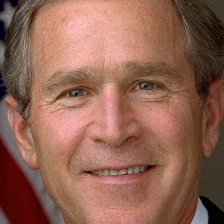

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(crop_img, (224,224), interpolation=cv2.INTER_LINEAR))

In [ ]:
test_img_features = pretrained_model.predict(preprocessed_img, batch_size=1)

_, indices = nn.kneighbors(test_img_features)

1/1 [==============================] - 0s 26ms/step


(1, 10)


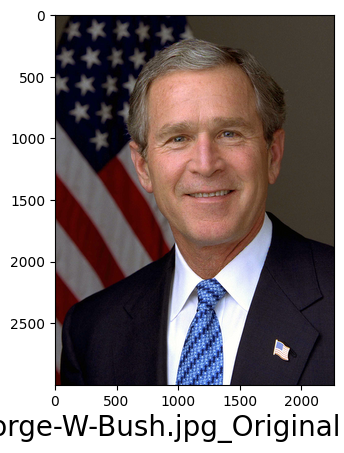

********* Predictions ***********


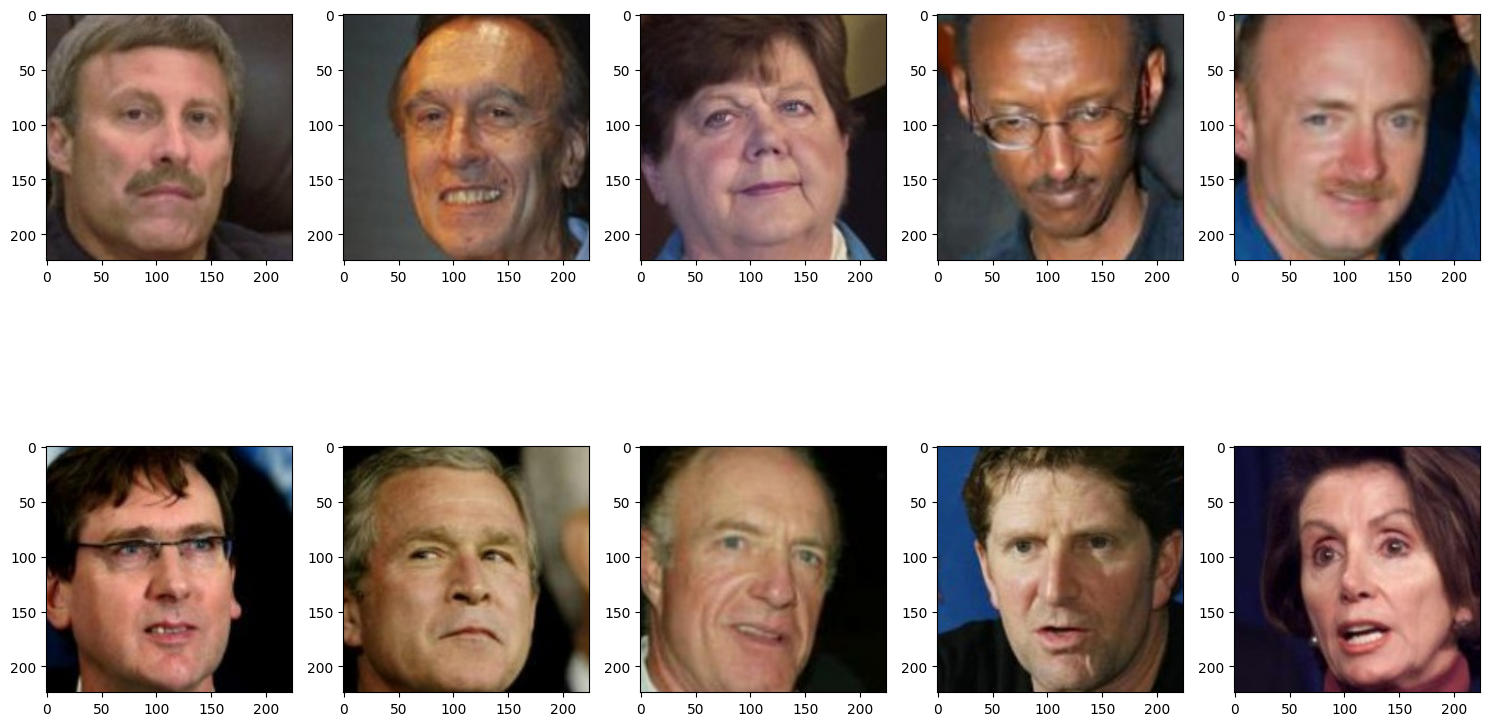

In [ ]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,5,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)
original_pic = os.path.basename(img_path)
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(original_pic + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

We didnt get the best performance with our model so we are going to reduce the dimensions for our feature array and see if there is any improvement with principal component analysis

In [ ]:
pca = PCA(n_components=1200)

In [ ]:
pca.fit(features)

compressed_features = pca.transform(features)

In [ ]:
nn_pca = NearestNeighbors(n_neighbors=10,
                             algorithm='ball_tree',
                             metric='euclidean').fit(compressed_features)

In [ ]:
test_img_compressed = pca.transform(test_img_features)

_, indices = nn_pca.kneighbors(test_img_compressed)

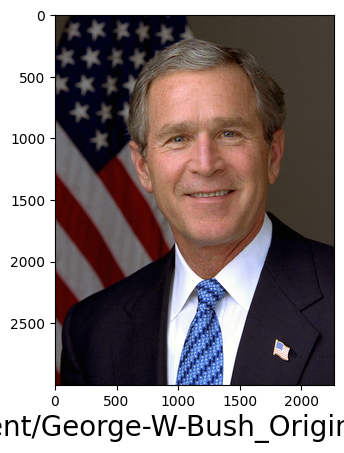

********* Predictions ***********


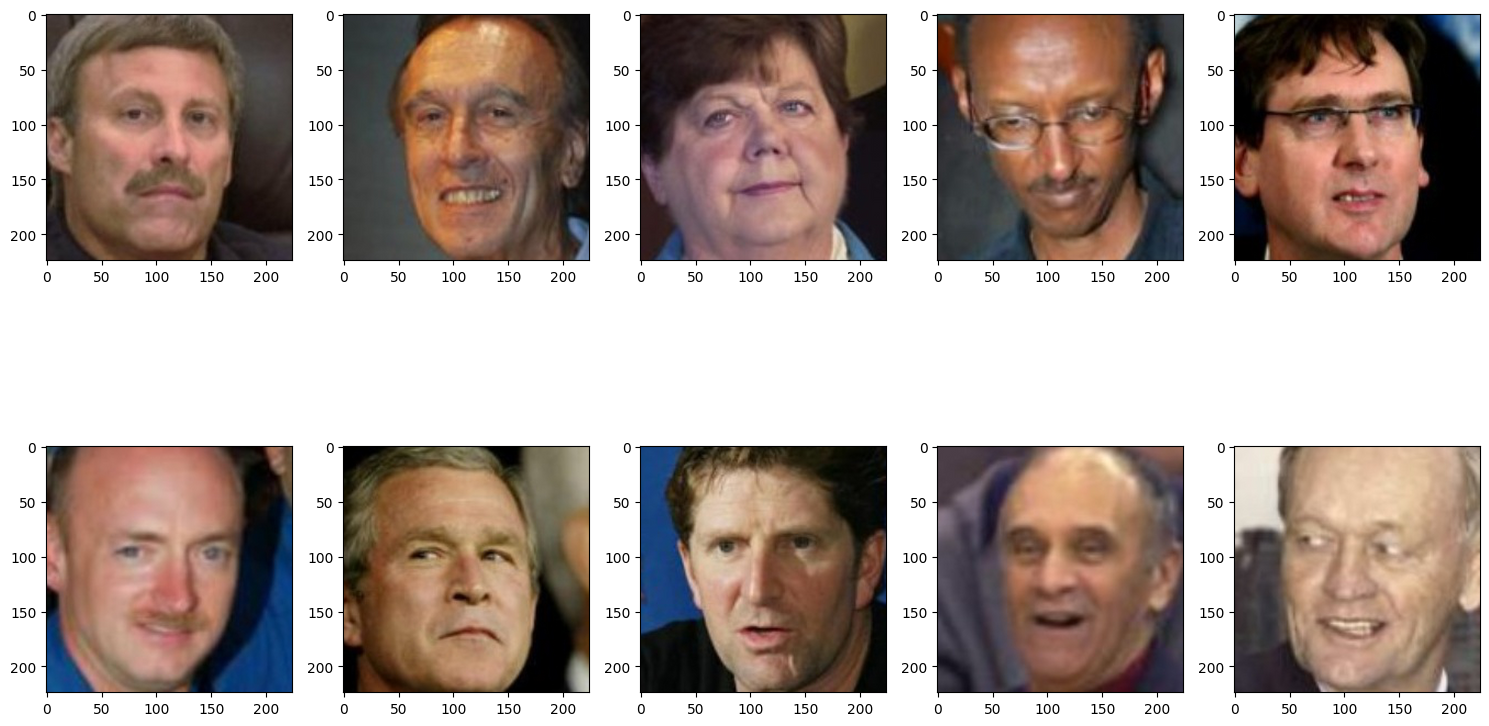

In [ ]:
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

As we can see there was no significance improve to our search, I think if I normalize the images from the start, we would have a slight improvement but only managed to get one similar image George W. Bush